In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

history = pd.DataFrame()

for i in range(9):
    f = open('spotify_data\StreamingHistory{}.json'.format(i), encoding='utf-8')
    data = json.load(f)
    df = pd.DataFrame(data)
    history = pd.concat([history, df], ignore_index=True)

spring = history.loc[history['endTime']<'2021-06-12'].copy()
summer = history.loc[(history['endTime']>='2021-06-12') & (history['endTime']<'2021-08-22')].copy()
fall = history.loc[history['endTime']>='2021-08-22'].copy()

spring['endTime']= pd.DatetimeIndex(spring['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
summer['endTime']= pd.DatetimeIndex(summer['endTime']).tz_localize('UTC').tz_convert('America/Los_Angeles').tz_localize(None)
fall['endTime']= pd.DatetimeIndex(fall['endTime']).tz_localize('UTC').tz_convert('America/New_York').tz_localize(None)
history = pd.concat([spring, summer, fall], ignore_index=True)

history['minsPlayed'] = history['msPlayed']/(1000*60)
history['hrsPlayed'] = history['msPlayed']/(1000*60*60)
history['year'] = pd.DatetimeIndex(history['endTime']).year
history['month'] = pd.DatetimeIndex(history['endTime']).month
history['day'] = pd.DatetimeIndex(history['endTime']).day
history['hour'] = pd.DatetimeIndex(history['endTime']).hour
history['dayofweek'] = pd.DatetimeIndex(history['endTime']).dayofweek
history

,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,year,month,day,hour,dayofweek
0,2021-01-15 19:02:00,Lauv,Sad Forever,203520,3.392000,0.056533,2021,1,15,19,4
1,2021-01-15 19:05:00,Lauv,Invisible Things,197306,3.288433,0.054807,2021,1,15,19,4
2,2021-01-15 19:09:00,Lauv,Julia,218000,3.633333,0.060556,2021,1,15,19,4
3,2021-01-15 19:13:00,Lauv,Modern Loneliness,252337,4.205617,0.070094,2021,1,15,19,4
4,2021-01-15 19:16:00,Lauv,Drugs & The Internet,178560,2.976000,0.049600,2021,1,15,19,4
...,...,...,...,...,...,...,...,...,...,...,...
85950,2022-01-16 18:47:00,Aly & AJ,Potential Breakup Song,25884,0.431400,0.007190,2022,1,16,18,6
85951,2022-01-16 18:47:00,Anson Seabra,Welcome to Wonderland,90145,1.502417,0.025040,2022,1,16,18,6
85952,2022-01-16 18:48:00,Lauren Spencer-Smith,Fingers Crossed,46376,0.772933,0.012882,2022,1,16,18,6
85953,2022-01-16 18:49:00,Haley Joelle,Memory Lane,85724,1.428733,0.023812,2022,1,16,18,6


# **Basic listenting statistics**

In [2]:
from collections import Counter


song_counts = Counter(history['trackName'])
artist_counts = Counter(history['artistName'])
print('Number of unique songs:', len(song_counts))
print('Number of unique artists:', len(artist_counts))

Number of unique songs: 8734
Number of unique artists: 2579


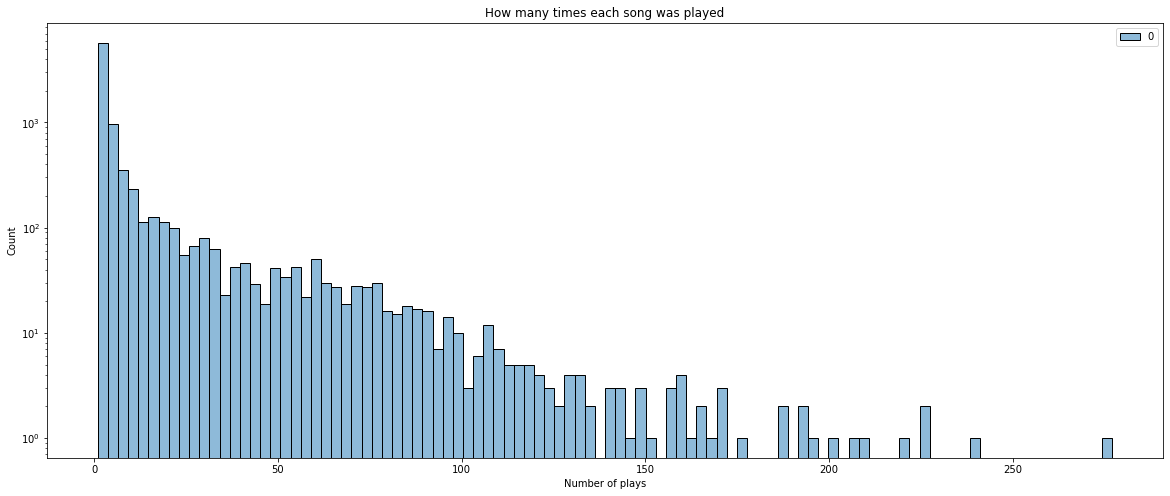

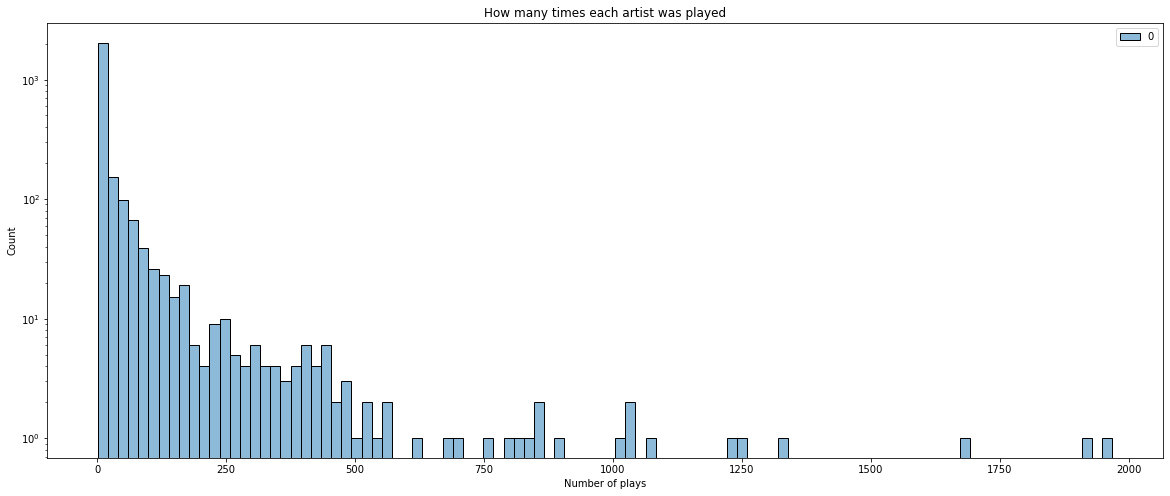

In [3]:
plt.figure(figsize=(20,8))
plt.title('How many times each song was played')
ax = sns.histplot(song_counts.values(), bins=100)
ax.set_yscale('log')
plt.xlabel('Number of plays')
plt.show()

plt.figure(figsize=(20,8))
plt.title('How many times each artist was played')
ax = sns.histplot(artist_counts.values(), bins=100)
ax.set_yscale('log')
plt.xlabel('Number of plays')
plt.show()


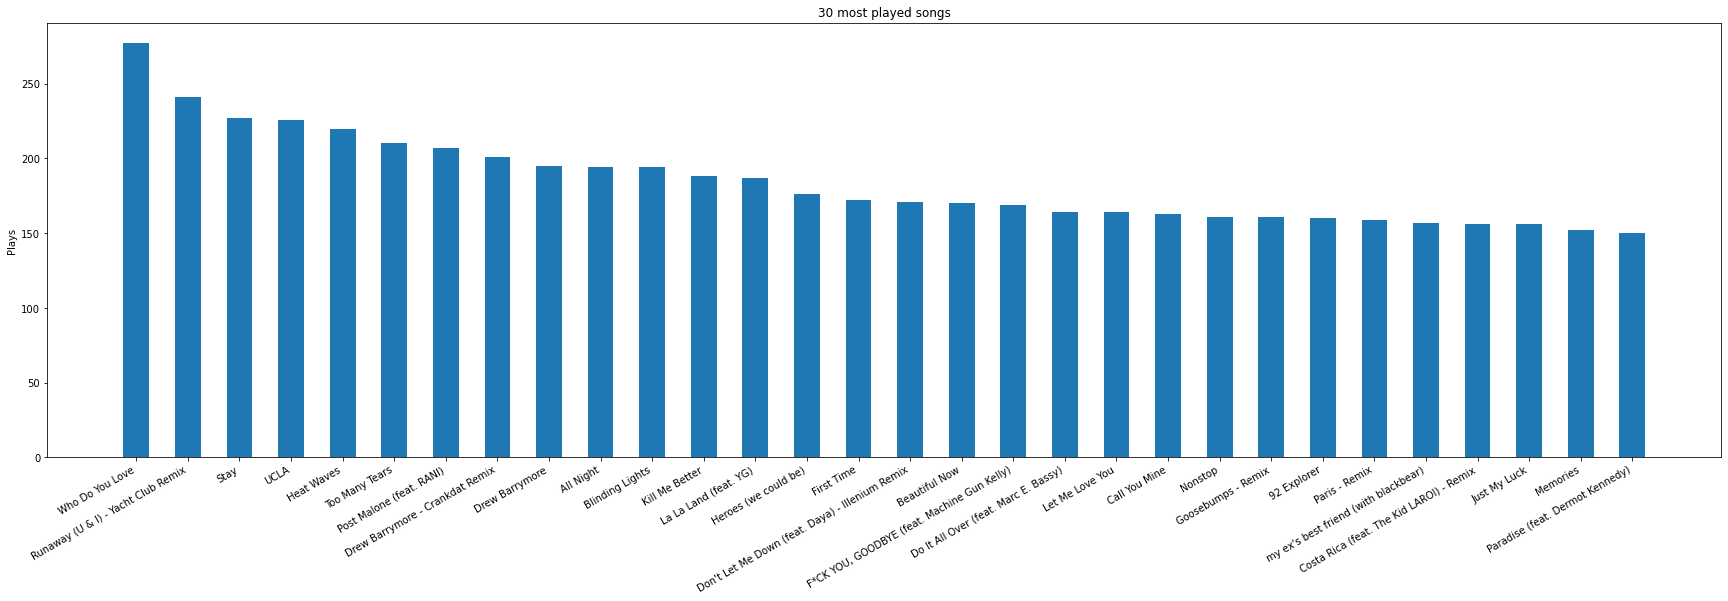

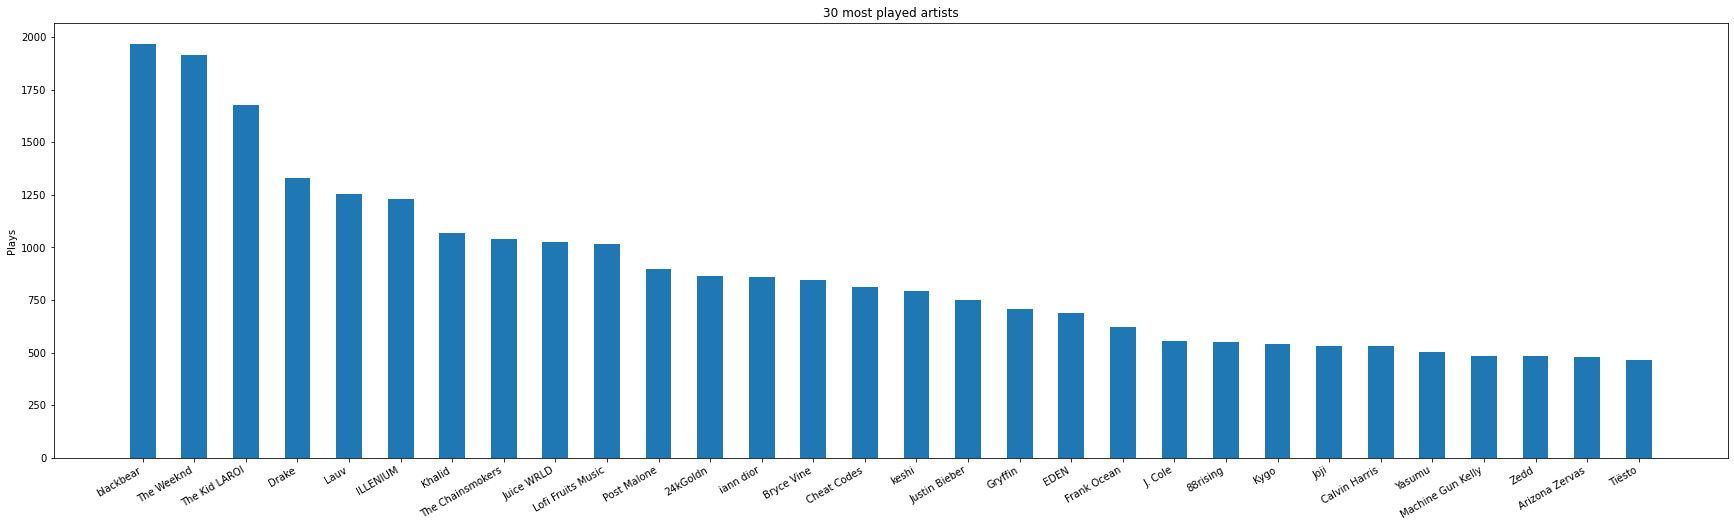

In [4]:
width = 0.5

labels, values = zip(*song_counts.most_common(30))
indexes = np.arange(len(labels))

plt.figure(figsize=(30,8))
plt.title('30 most played songs')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Plays')
plt.show()


labels, values = zip(*artist_counts.most_common(30))
indexes = np.arange(len(labels))
\
plt.figure(figsize=(30,8))
plt.title('30 most played artists')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Plays')
plt.show()

# **Distribution of listening during times of the day**

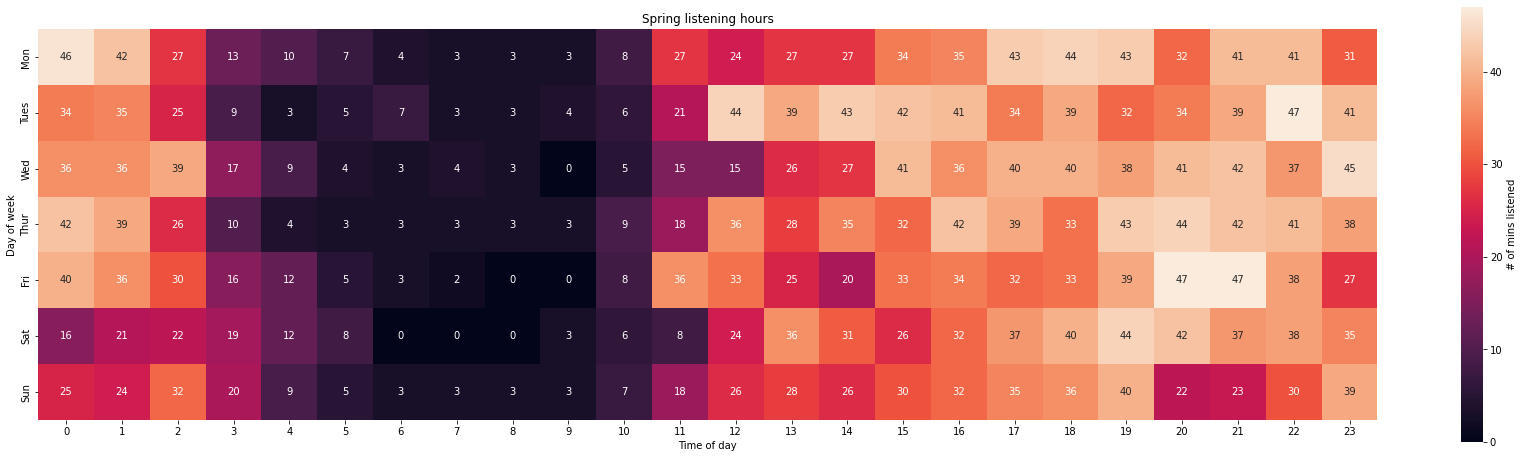

In [5]:
spring_history = history.loc[(history['endTime']< '2021-05-19')& (history['endTime']> '2021-02-01')]

listening_times = spring_history.groupby(['dayofweek', 'hour']).agg({'minsPlayed': ['sum']})//16
listening_times = listening_times.unstack(fill_value=0)
listening_times.columns = listening_times.columns.droplevel([0,1])

plt.figure(figsize=(30,20))
plt.title('Spring listening hours')
ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cbar_kws={"shrink": .4, 'label': '# of mins listened'})
plt.ylabel('Day of week')
plt.xlabel('Time of day')
plt.show()


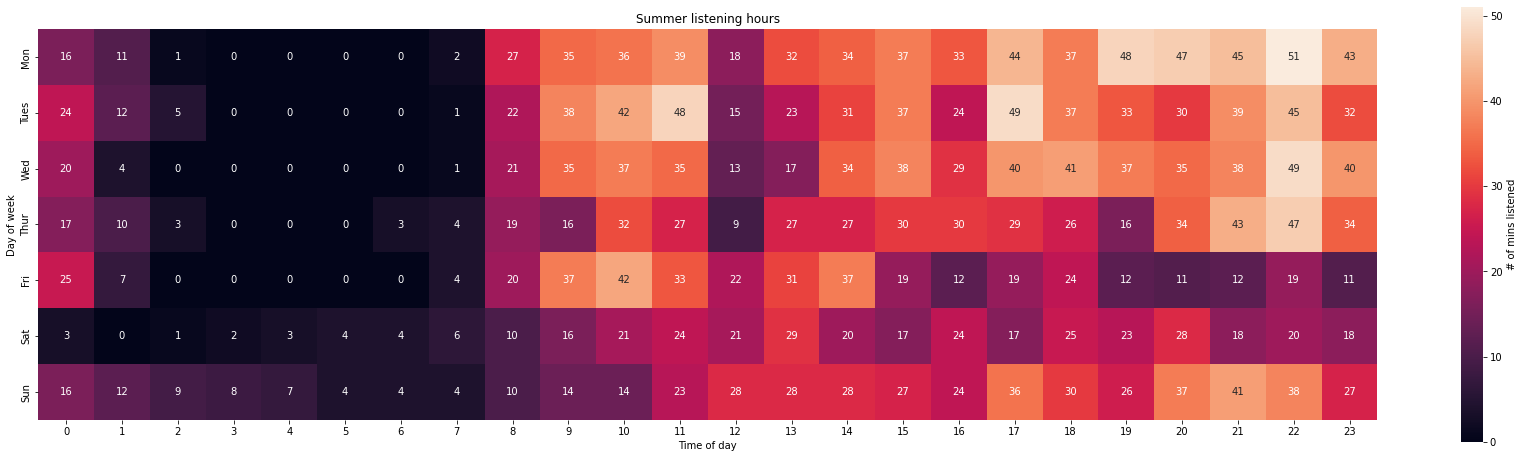

In [6]:
summer_history = history.loc[(history['endTime']< '2021-09-01') & (history['endTime']> '2021-06-12')]

listening_times = summer_history.groupby(['dayofweek', 'hour']).agg({'minsPlayed': ['sum']})//12
listening_times = listening_times.unstack(fill_value=0)
listening_times.columns = listening_times.columns.droplevel([0,1])

plt.figure(figsize=(30,20))
plt.title('Summer listening hours')
ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cbar_kws={"shrink": .4, 'label': '# of mins listened'})
plt.ylabel('Day of week')
plt.xlabel('Time of day')
plt.show()


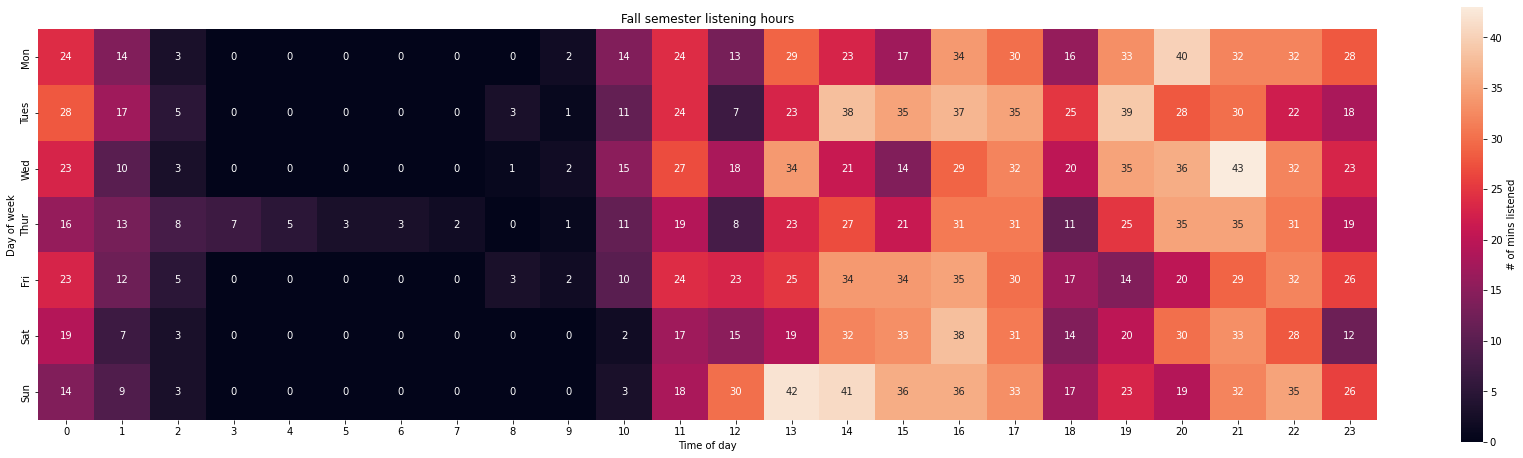

In [7]:
fall_history = history.loc[(history['endTime']>='2021-09-01')&(history['endTime']<'2021-12-23')]
listening_times = fall_history.groupby(['dayofweek', 'hour']).agg({'minsPlayed': ['sum']})//17
listening_times = listening_times.unstack(fill_value=0)
listening_times.columns = listening_times.columns.droplevel([0,1])

plt.figure(figsize=(30,20))
plt.title('Fall semester listening hours')
ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cbar_kws={"shrink": .4, 'label': '# of mins listened'})
plt.ylabel('Day of week')
plt.xlabel('Time of day')
plt.show()


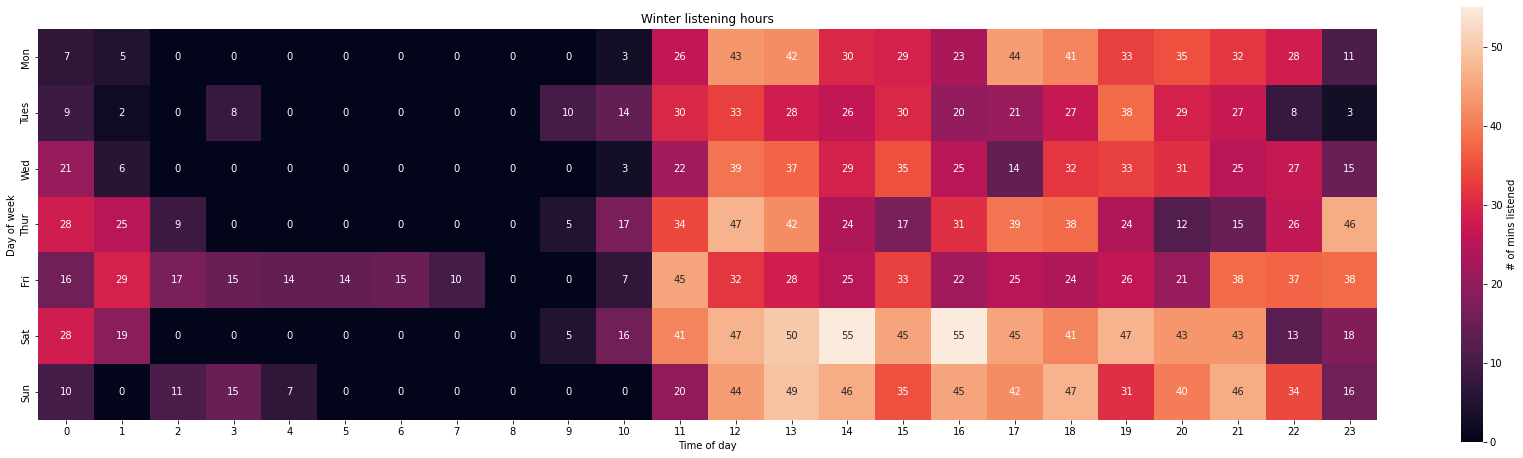

In [8]:
winter_history = history.loc[(history['endTime']>='2021-12-23')]
listening_times = winter_history.groupby(['dayofweek', 'hour']).agg({'minsPlayed': ['sum']})//4
listening_times = listening_times.unstack(fill_value=0)
listening_times.columns = listening_times.columns.droplevel([0,1])

plt.figure(figsize=(30,20))
plt.title('Winter listening hours')
ax= sns.heatmap(listening_times, annot=True, square = True, yticklabels=['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'],cbar_kws={"shrink": .4, 'label': '# of mins listened'})
plt.ylabel('Day of week')
plt.xlabel('Time of day')
plt.show()

# **Listening over time**

In [9]:
listening_over_time = history.groupby(['year', 'month', 'day'], as_index=False)['hrsPlayed'].agg(sum)
listening_over_time['weekly_avg'] = listening_over_time['hrsPlayed'].rolling(7, center=True).mean()
listening_over_time['monthly_avg'] = listening_over_time['hrsPlayed'].rolling(30, center=True).mean()
listening_over_time['date'] = listening_over_time[listening_over_time.columns[:3]].apply(lambda x: '-'.join(x.astype(str)), axis=1)
listening_over_time

,year,month,day,hrsPlayed,weekly_avg,monthly_avg,date
0,2021,1,15,2.675541,NaN,NaN,2021-1-15
1,2021,1,16,7.386872,NaN,NaN,2021-1-16
2,2021,1,17,6.392883,NaN,NaN,2021-1-17
3,2021,1,18,11.109373,6.703402,NaN,2021-1-18
4,2021,1,19,8.413294,7.732479,NaN,2021-1-19
...,...,...,...,...,...,...,...
362,2022,1,12,7.601646,10.190534,NaN,2022-1-12
363,2022,1,13,7.236065,9.296294,NaN,2022-1-13
364,2022,1,14,10.812957,NaN,NaN,2022-1-14
365,2022,1,15,13.712721,NaN,NaN,2022-1-15


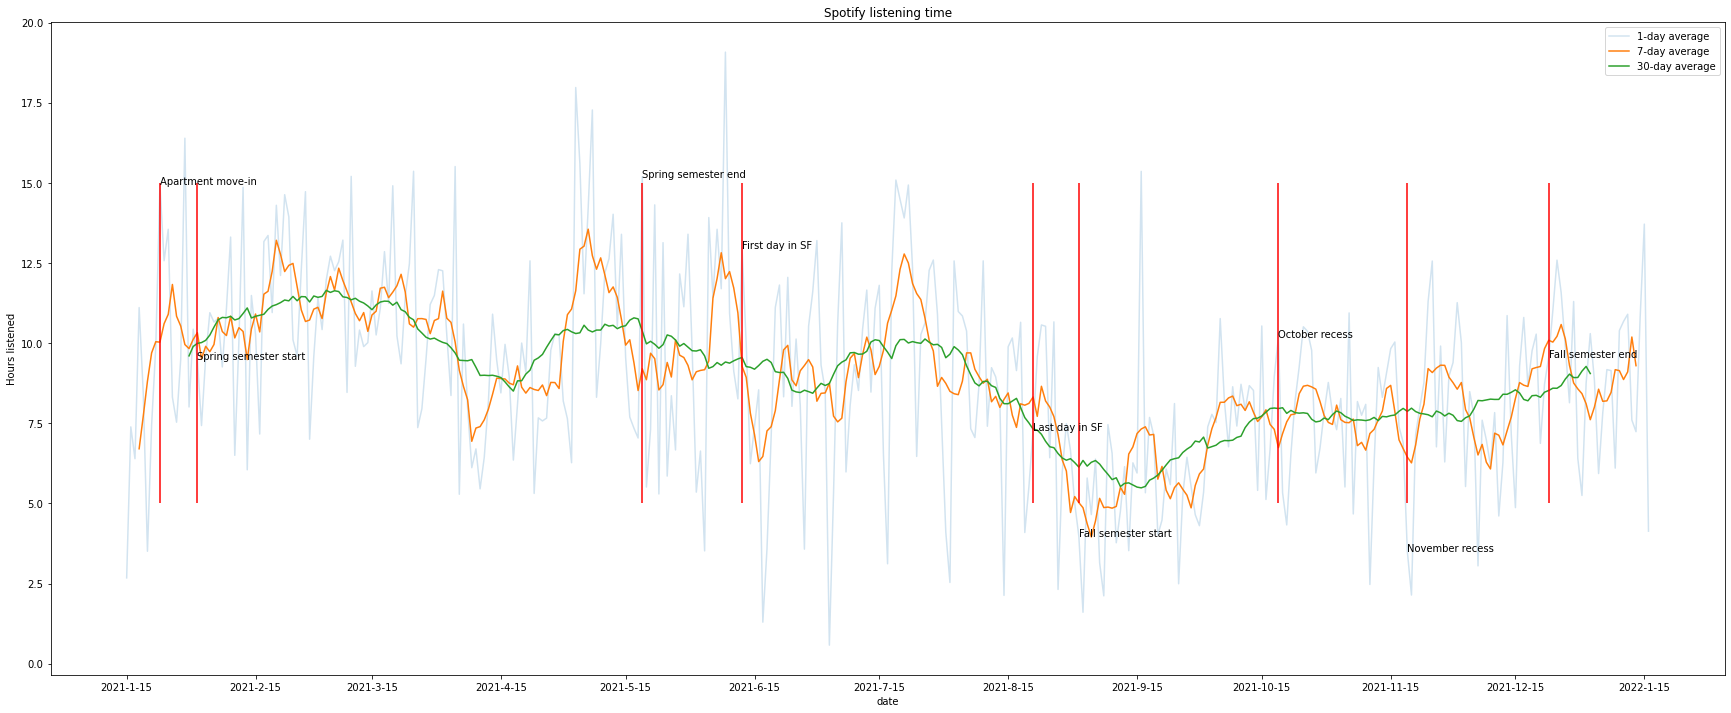

In [10]:
from matplotlib import dates

plt.figure(figsize=(30,12))
ax = sns.lineplot(data = listening_over_time,  x='date', y ='hrsPlayed', label='1-day average', alpha=0.2)
ax = sns.lineplot(data = listening_over_time,  x='date', y ='weekly_avg', label='7-day average')
ax = sns.lineplot(data = listening_over_time,  x='date', y ='monthly_avg', label='30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 

significant_dates = {'2021-1-23': 'Apartment move-in',
                     '2021-2-1': 'Spring semester start', 
                     '2021-5-19':'Spring semester end',
                     '2021-6-12': 'First day in SF', 
                     '2021-8-21': 'Last day in SF',
                     '2021-9-1': 'Fall semester start',
                     '2021-10-19': 'October recess',
                     '2021-11-19': 'November recess',
                     '2021-12-23': 'Fall semester end'}

for date, desc in significant_dates.items():
    hrs  = np.array(listening_over_time.loc[listening_over_time['date'] ==date, 'hrsPlayed'])
    plt.vlines(x=date, ymin=5, ymax=15, color="red", )
    plt.text(date, hrs, desc)

plt.title('Spotify listening time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()

# **Distribution of number of daily listening hours**

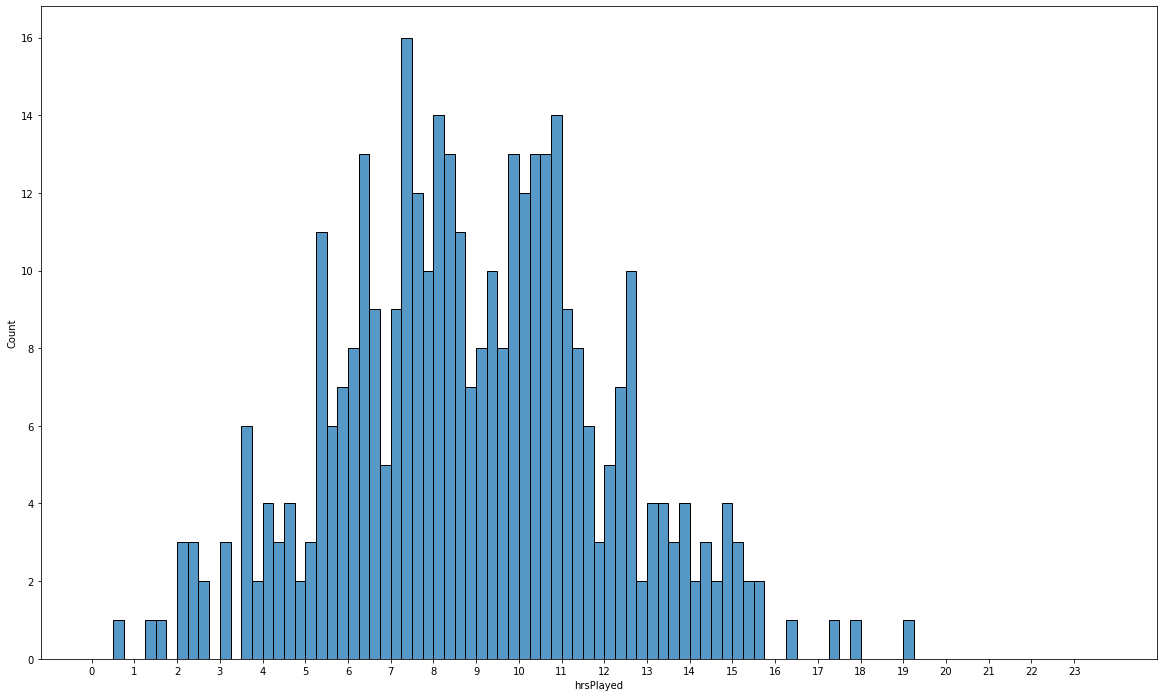

In [11]:
plt.figure(figsize=(20,12))
sns.histplot(listening_over_time['hrsPlayed'], bins=np.arange(0, 24, 0.25))
plt.xticks(np.arange(24))
plt.show()

# **Genre Distribution**

In [12]:
from config import sp
from tqdm import tqdm


artists= {}
for artist in tqdm(set(history['artistName'])):
    try:
        results = sp.search(artist, type='artist')
        artist_id = results.get('artists').get('items')[0].get('uri')
        artist_genres = results.get('artists').get('items')[0].get('genres')
    except Exception as e:
        print(e)
        print(artist)
        artist_id = ''
        artist_genres = []
    artists[artist] = {'genres': artist_genres, 'id': artist_id}
artists_df = pd.DataFrame.from_dict(artists, orient='index')
artists_df

  0%|          | 10/2579 [00:01<05:23,  7.94it/s]

list index out of range
2021 Wrapped


 11%|█         | 278/2579 [00:35<04:31,  8.48it/s]

list index out of range
Mokita,Kina


 43%|████▎     | 1119/2579 [02:21<02:45,  8.85it/s]

list index out of range
Two Friends Mixes


 47%|████▋     | 1215/2579 [02:33<03:10,  7.15it/s]

list index out of range
Stem The Remixer


 52%|█████▏    | 1346/2579 [02:49<02:44,  7.49it/s]

list index out of range
Louder Than A Riot


 65%|██████▌   | 1679/2579 [03:30<01:47,  8.40it/s]

list index out of range
Song Exploder


 97%|█████████▋| 2504/2579 [05:15<00:10,  7.02it/s]

list index out of range
FuckYouJai


100%|██████████| 2579/2579 [05:25<00:00,  7.93it/s]


,genres,id
Refeeld,"[focus beats, lo-fi beats]",spotify:artist:04VwrPirvx6CXRzbEjofQP
Carnage,"[edm, electro house, electronic trap, pop rap,...",spotify:artist:7CCjtD0hCK005Bvg2WG1a7
Ben Woodward,"[acoustic chill, viral pop]",spotify:artist:142VT1MtWzaD13CnOiKFDn
Lennon Stella,"[alt z, canadian pop, dance pop, electropop, p...",spotify:artist:1cZQSpDsxgKIX2yW5OR9Ot
Alaina Castillo,"[alt z, chill r&b, pop, social media pop]",spotify:artist:0duLKMlcwhyZgqu8zSSjBp
...,...,...
FINNEAS,"[alt z, electropop, la indie, pop]",spotify:artist:37M5pPGs6V1fchFJSgCguX
bodie,[],spotify:artist:692n9oP6XtKux7LbSOnkSC
Kunis,[],spotify:artist:6S3DzPANfTWOacHiKfOsEX
Blxst,[pop rap],spotify:artist:4qXC0i02bSFstECuXP2ZpL


In [13]:
genres = []
max_genres = 0
for artist in tqdm(history['artistName']):
    max_genres = max(max_genres, len(artists[artist]['genres']))
    
    genres.append(artists[artist]['genres'])
genres_df = pd.DataFrame(genres, columns=['genre{}'.format(i) for i in range(1, max_genres+1)])
genre_history = pd.concat([history, genres_df], axis=1)
genre_history['genres'] =  genres
genre_history

100%|██████████| 85955/85955 [00:00<00:00, 526558.44it/s]


,endTime,artistName,trackName,msPlayed,minsPlayed,hrsPlayed,year,month,day,hour,...,genre5,genre6,genre7,genre8,genre9,genre10,genre11,genre12,genre13,genres
0,2021-01-15 19:02:00,Lauv,Sad Forever,203520,3.392000,0.056533,2021,1,15,19,...,None,None,None,None,None,None,None,None,None,"[dance pop, electropop, pop]"
1,2021-01-15 19:05:00,Lauv,Invisible Things,197306,3.288433,0.054807,2021,1,15,19,...,None,None,None,None,None,None,None,None,None,"[dance pop, electropop, pop]"
2,2021-01-15 19:09:00,Lauv,Julia,218000,3.633333,0.060556,2021,1,15,19,...,None,None,None,None,None,None,None,None,None,"[dance pop, electropop, pop]"
3,2021-01-15 19:13:00,Lauv,Modern Loneliness,252337,4.205617,0.070094,2021,1,15,19,...,None,None,None,None,None,None,None,None,None,"[dance pop, electropop, pop]"
4,2021-01-15 19:16:00,Lauv,Drugs & The Internet,178560,2.976000,0.049600,2021,1,15,19,...,None,None,None,None,None,None,None,None,None,"[dance pop, electropop, pop]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85950,2022-01-16 18:47:00,Aly & AJ,Potential Breakup Song,25884,0.431400,0.007190,2022,1,16,18,...,pop,post-teen pop,None,None,None,None,None,None,None,"[dance pop, electropop, girl group, indie popt..."
85951,2022-01-16 18:47:00,Anson Seabra,Welcome to Wonderland,90145,1.502417,0.025040,2022,1,16,18,...,None,None,None,None,None,None,None,None,None,"[alt z, gen z singer-songwriter, pop]"
85952,2022-01-16 18:48:00,Lauren Spencer-Smith,Fingers Crossed,46376,0.772933,0.012882,2022,1,16,18,...,None,None,None,None,None,None,None,None,None,"[alt z, gen z singer-songwriter, pop]"
85953,2022-01-16 18:49:00,Haley Joelle,Memory Lane,85724,1.428733,0.023812,2022,1,16,18,...,None,None,None,None,None,None,None,None,None,[gen z singer-songwriter]


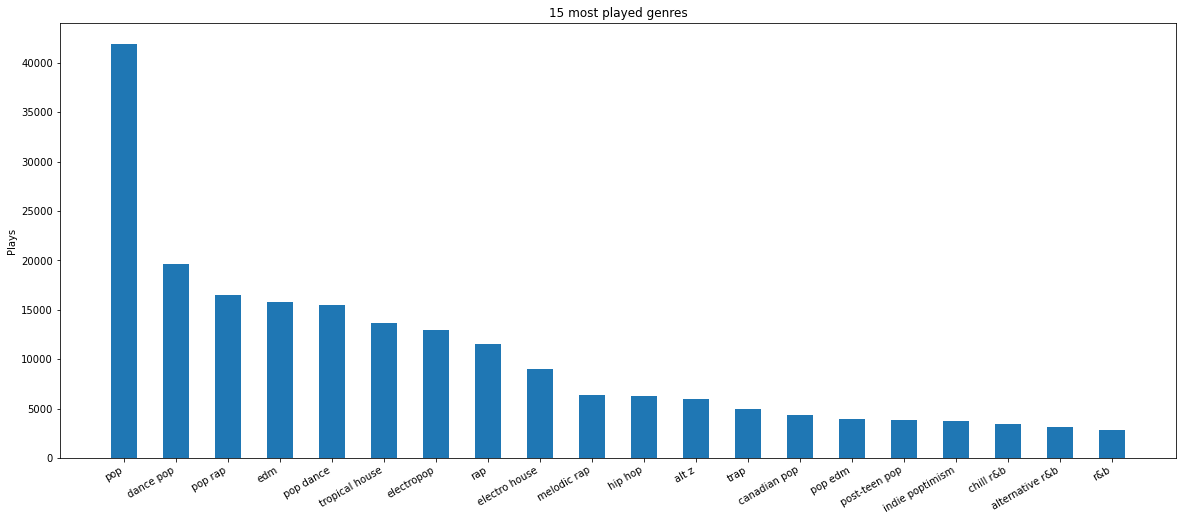

In [14]:
top_genres = (
    genres_df.apply(pd.Series.value_counts)
    .apply(np.sum, axis=1)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'genre', 0: 'count'})
)

width = 0.5
labels, values = top_genres.iloc[:20, 0], top_genres.iloc[:20, 1]
indexes = np.arange(len(labels))

plt.figure(figsize=(20,8))
plt.title('15 most played genres')
plt.bar(indexes, values, width)
plt.xticks(indexes, labels, rotation = 30, ha='right')
plt.ylabel('Plays')
plt.show()


# **Genres over time**

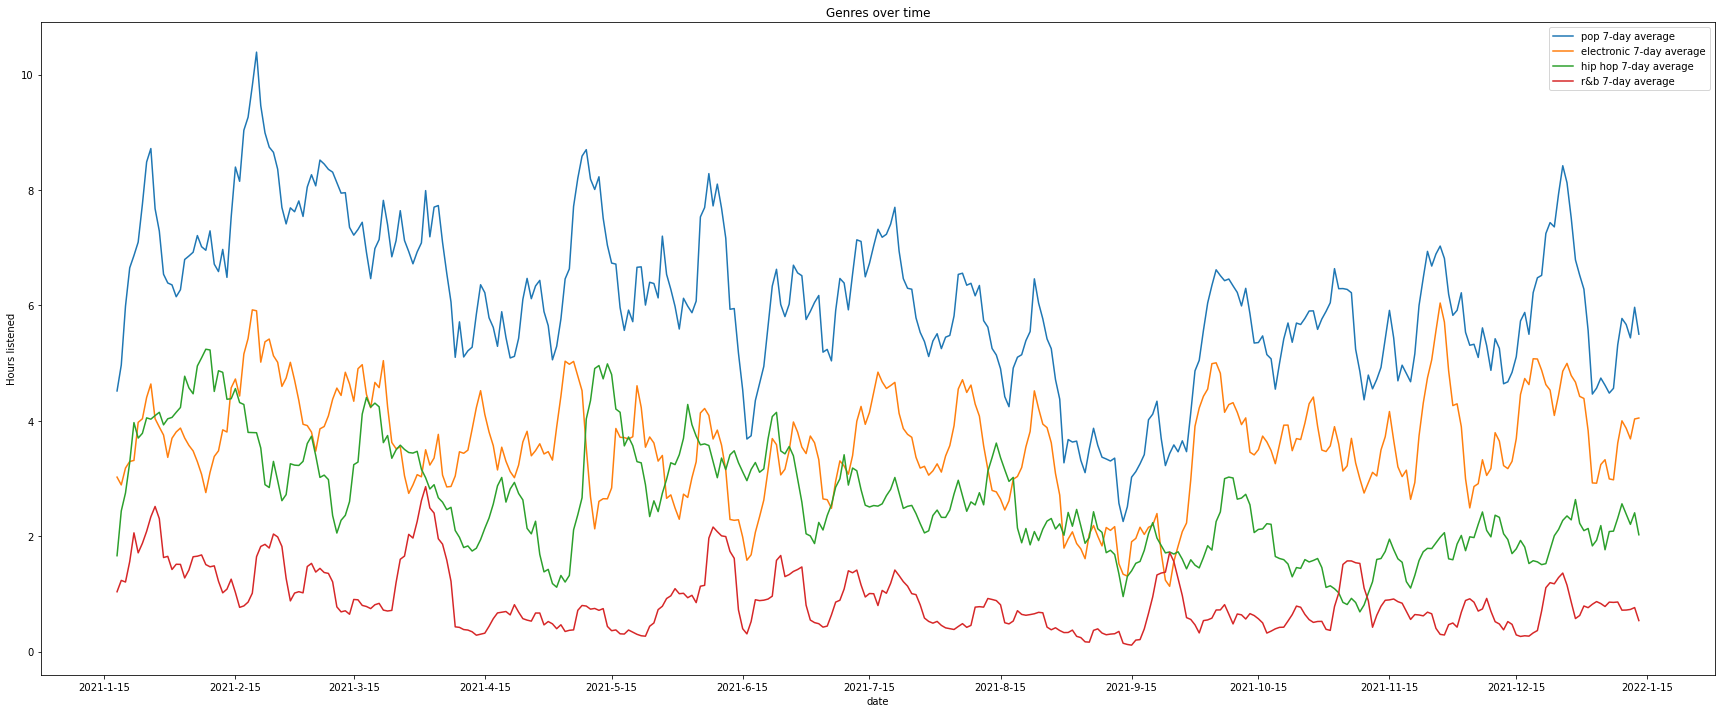

In [15]:
top_genres = {'pop': set(['pop', 'dance pop', 'pop rap', 'pop dance', 'canadian pop', 'pop edm', 'post-teen pop', 'indie poptimism']),
              'electronic': set(['dance pop', 'edm', 'pop dance', 'tropical house', 'electropop', 'electro house', 'trap', 'pop edm']),
              'hip hop': set(['pop rap', 'rap', 'melodic rap', 'hip hop']),
              'r&b': set(['chill r&b', 'alternative r&b', 'r&b'])
              }

genres_over_time = listening_over_time.copy()
genre_histories = {}
for genre, subgenres in top_genres.items():
    df = genre_history.loc[genre_history['genres'].apply(lambda x: list(set(x).intersection(subgenres))).map(len)>0]
    genre_over_time = df.groupby(['year', 'month', 'day'], as_index=False)['hrsPlayed'].agg(sum)
    genre_over_time.rename(columns = {"hrsPlayed": "{}_hrsPlayed".format(genre)},inplace = True)
    genres_over_time=genres_over_time.merge(genre_over_time, how='left', on = ['year', 'month', 'day'])
    genres_over_time["{}_hrsPlayed".format(genre)].fillna(value=0,inplace=True)
    genres_over_time[genre+'_weekly_avg'] = genres_over_time[genre+'_hrsPlayed'].rolling(7, center=True).mean()
    genres_over_time[genre+'_monthly_avg'] = genres_over_time[genre+'_hrsPlayed'].rolling(30, center=True).mean()
    genre_histories[genre] = genre_over_time


plt.figure(figsize=(30,12))
for genre in top_genres.keys():
    ax = sns.lineplot(data = genres_over_time,  x='date', y =genre+'_weekly_avg', label=genre+' 7-day average')

ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.title('Genres over time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()


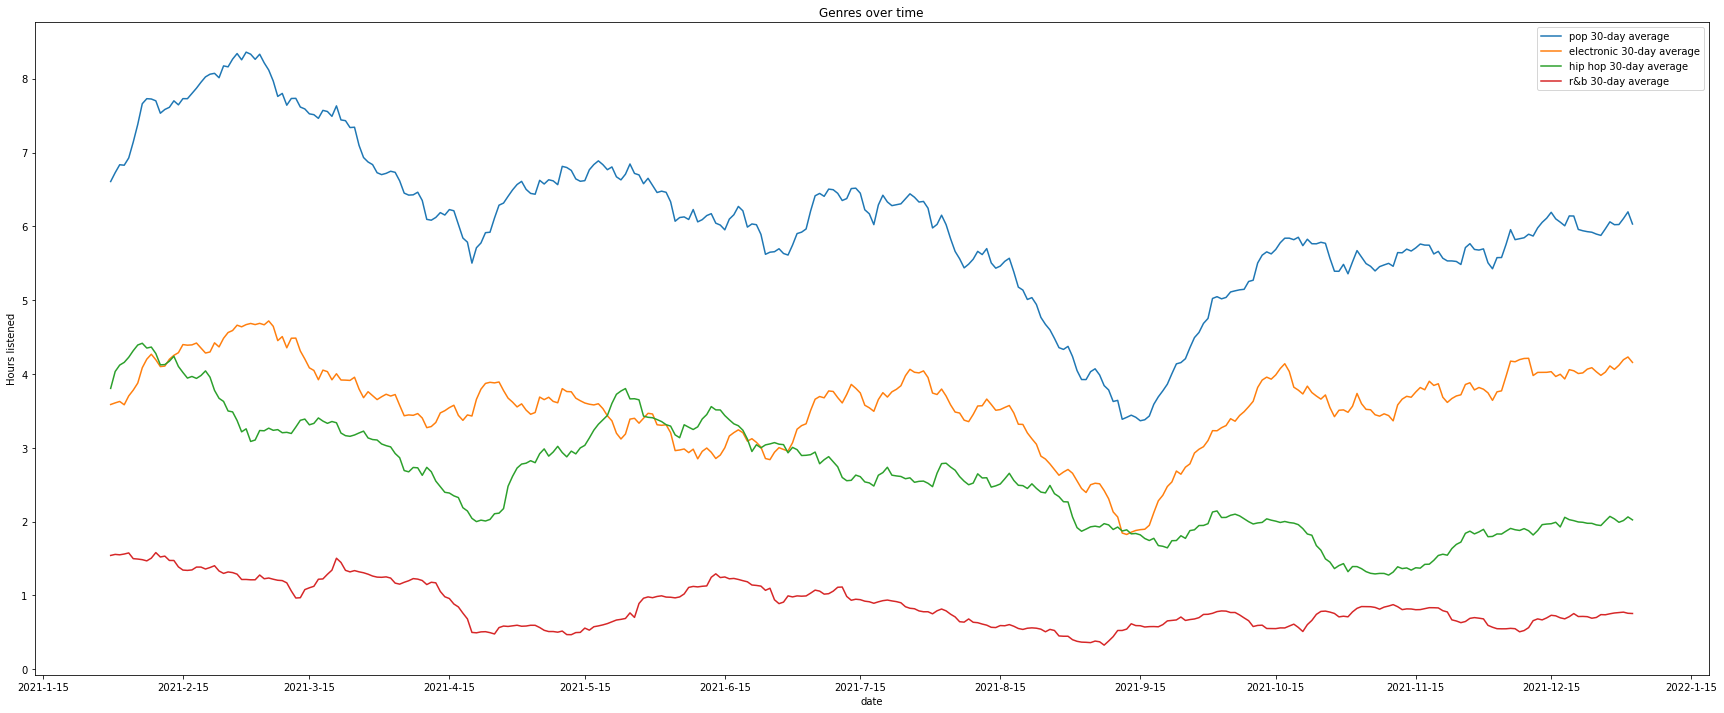

In [16]:
plt.figure(figsize=(30,12))
for genre, subgenres in top_genres.items(): 
    ax = sns.lineplot(data = genres_over_time,  x='date', y =genre+'_monthly_avg', label=genre+' 30-day average')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.title('Genres over time')
plt.ylabel("Hours listened")
plt.legend()
plt.show()


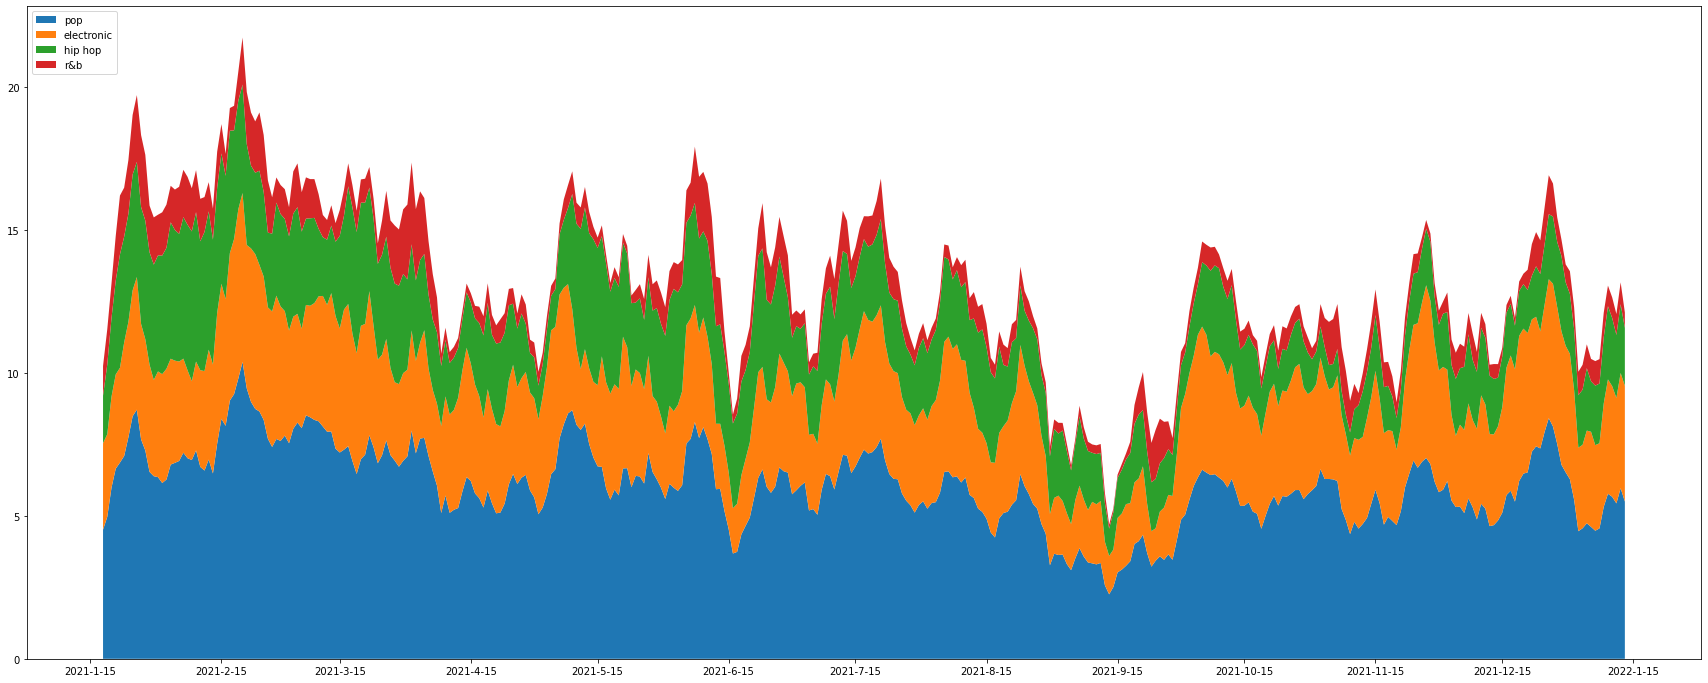

In [17]:

plt.figure(figsize=(30,12))
fig = plt.stackplot(genres_over_time['date'], [genres_over_time[genre+'_weekly_avg'] for genre in top_genres.keys()], labels = [genre for genre in top_genres.keys()])
for x in fig:
    x.axes.xaxis.set_major_locator(dates.MonthLocator(interval=1)) 
plt.legend(loc='upper left')
plt.show()